In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_df = pd.read_parquet("data/train.parquet")
train_df.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [10]:
train_df.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count
count,4.968270e+05,496827.000000,496827,496827,496827.000000,496827.000000,496827.000000
mean,1.053450e+08,60.191475,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,48.854343,2.345479,3.079917
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000
25%,1.000475e+08,5.000000,2020-12-05 22:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.791759
50%,1.000562e+08,29.000000,2021-03-08 11:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.401197
75%,1.000563e+08,79.000000,2021-06-09 14:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027
max,3.000147e+08,1302.000000,2021-09-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.172425
std,3.210346e+07,87.590566,NaN,NaN,0.018554,0.038026,1.659899


array([[<Axes: title={'center': 'site_id'}>,
        <Axes: title={'center': 'bike_count'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'counter_installation_date'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'log_bike_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

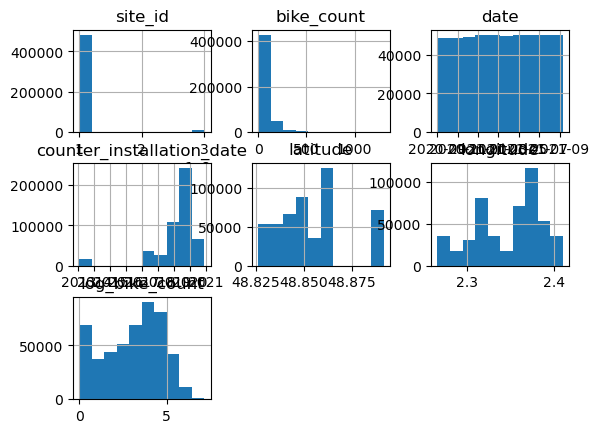

In [11]:
train_df.hist()

In [12]:
# Check for missing values
missing_values = train_df.isnull().sum()
print(missing_values)

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
bike_count                   0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
log_bike_count               0
dtype: int64


counter_id: 56 unique values
counter_name: 56 unique values
site_name: 30 unique values
coordinates: 30 unique values
counter_technical_id: 30 unique values


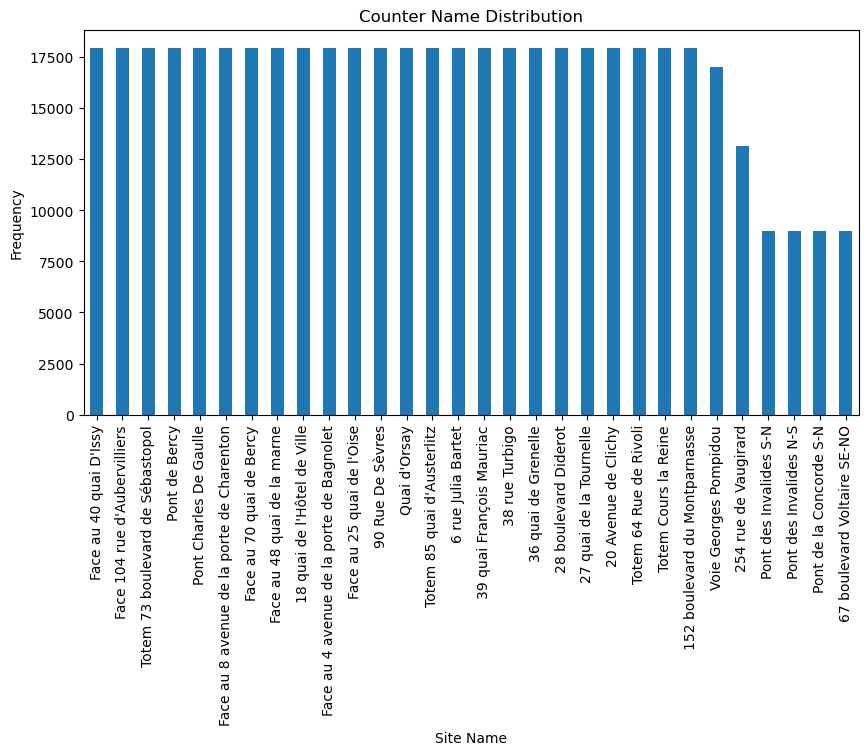

In [16]:

for col in train_df.select_dtypes(include='category').columns:
    print(f"{col}: {train_df[col].nunique()} unique values")


train_df['site_name'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Counter Name Distribution")
plt.xlabel("Site Name")
plt.ylabel("Frequency")
plt.show()


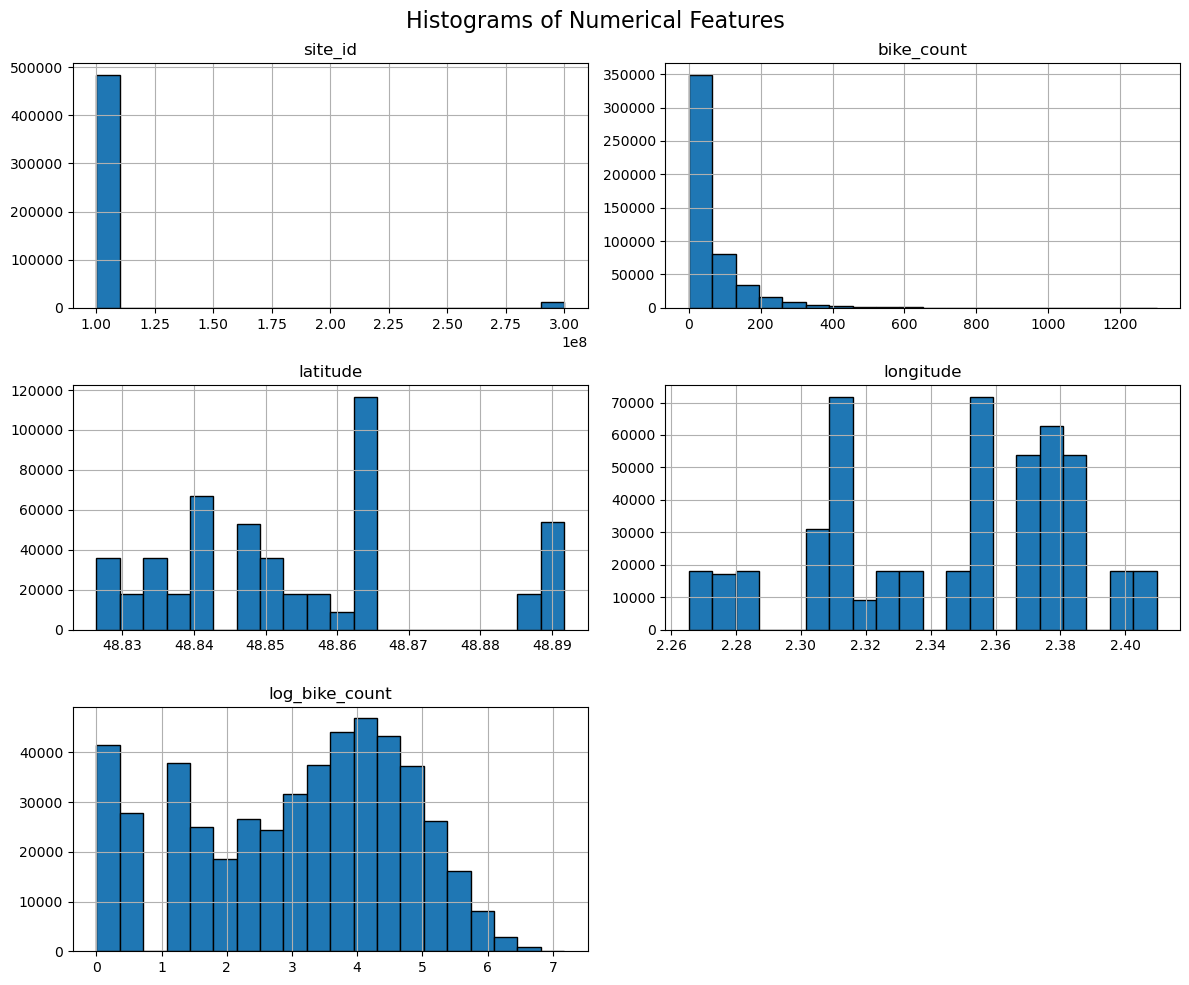

C:\Users\sheet\AppData\Local\Temp\ipykernel_59760\2022218082.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['bike_count'], shade=True)


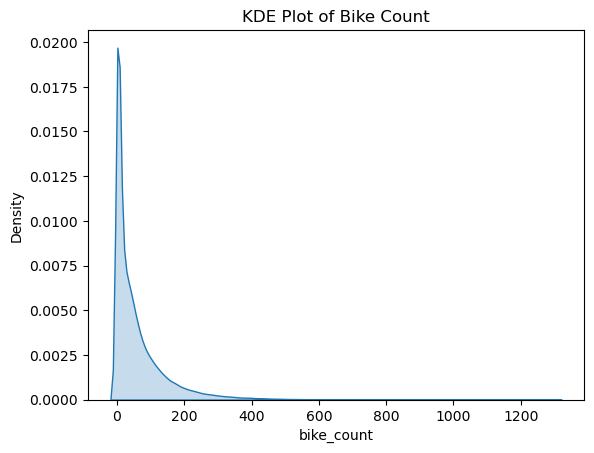

In [17]:

numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


sns.kdeplot(train_df['bike_count'], shade=True)
plt.title("KDE Plot of Bike Count")
plt.show()

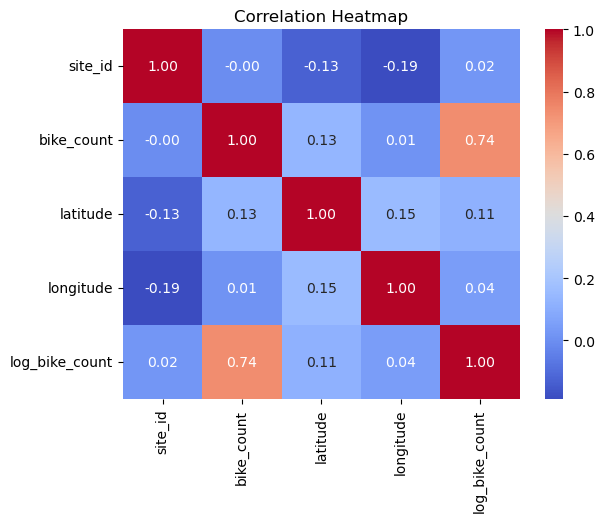

In [18]:
# Correlation heatmap
corr_matrix = train_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()




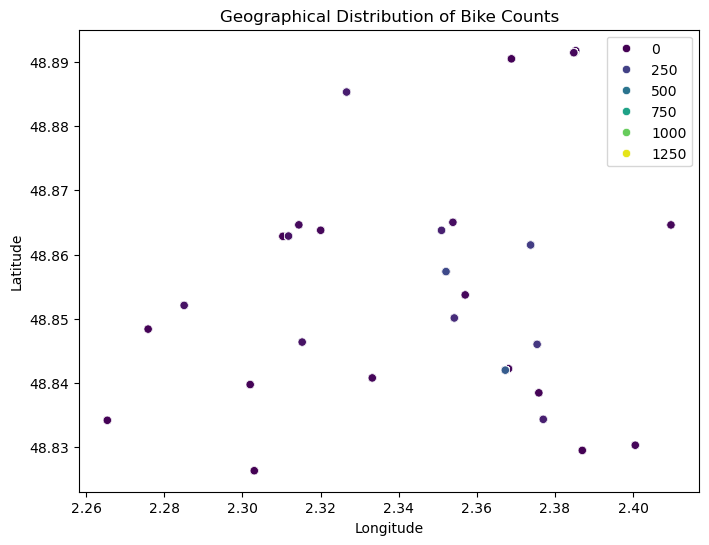

In [19]:
# Scatter plot between `latitude` and `longitude`
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='bike_count', data=train_df, palette='viridis')
plt.title("Geographical Distribution of Bike Counts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [20]:
# Extract date features
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['hour'] = train_df['date'].dt.hour

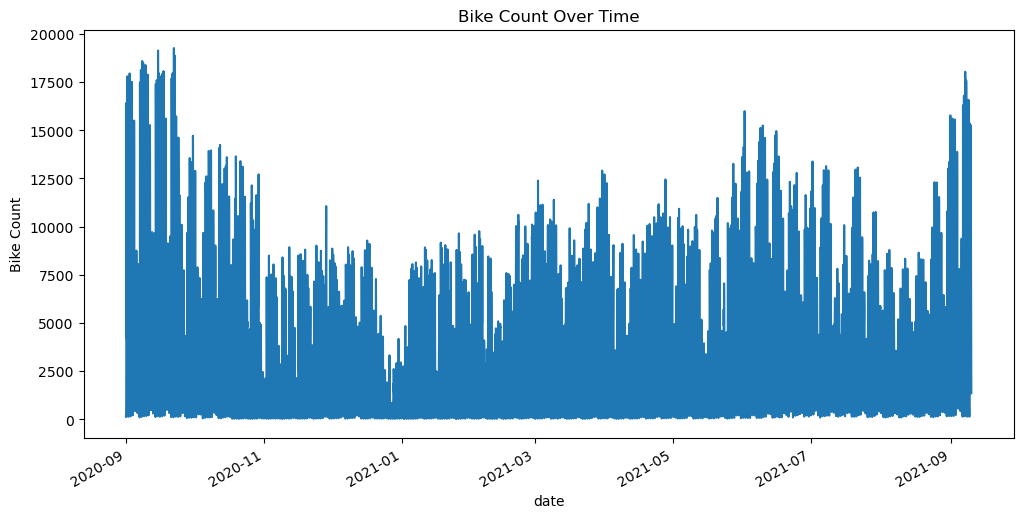

In [21]:
# Plotting bike counts over time
plt.figure(figsize=(12, 6))
train_df.groupby('date')['bike_count'].sum().plot()
plt.title("Bike Count Over Time")
plt.ylabel("Bike Count")
plt.show()


C:\Users\sheet\AppData\Local\Temp\ipykernel_59760\3566744225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['bike_count'], palette='viridis')


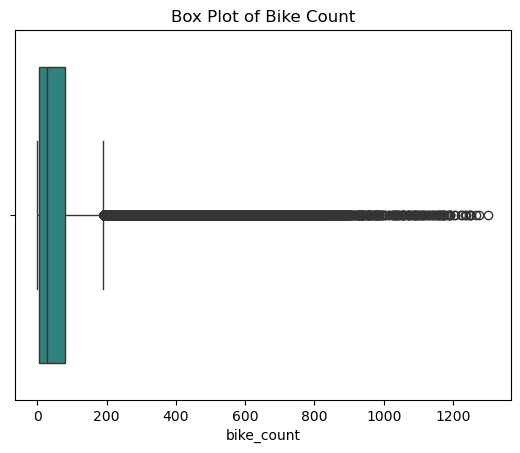

In [23]:
# Boxplot for `bike_count`
sns.boxplot(x=train_df['bike_count'], palette='viridis')
plt.title("Box Plot of Bike Count")
plt.show()


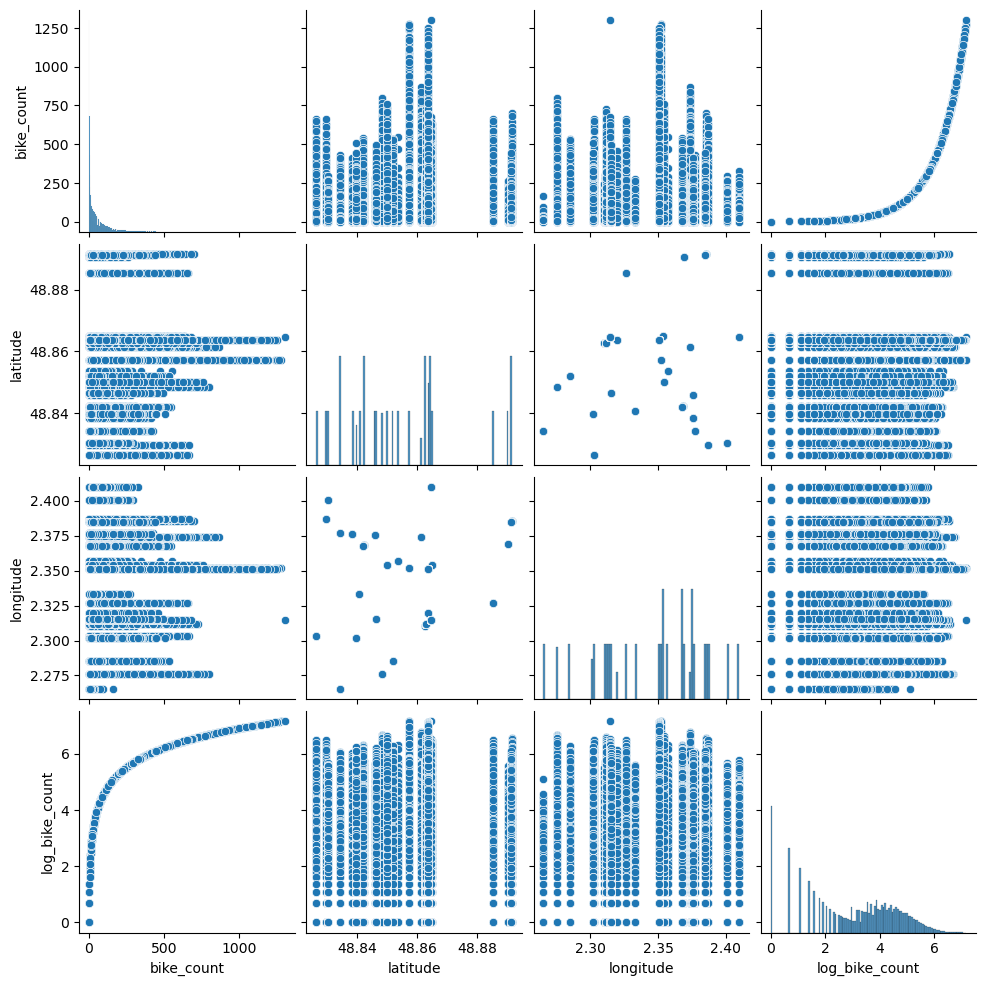

In [26]:
# Pair plot for selected features
select_cols = ['bike_count', 'latitude', 'longitude', 'log_bike_count']
sns.pairplot(train_df[select_cols])
plt.show()
